### Code Implementation

In [1]:
# Importing necessary libraries
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential
from sklearn.model_selection import train_test_split
from keras.models import load_model
from sklearn.metrics import classification_report
import pickle

### Loading Dataset

In [2]:
# Opening file for reading in binary mode
with open('D:\Project\Traffic Sign Detection\DATABASE/data8.pickle', 'rb') as f:
    gray_data = pickle.load(f, encoding='latin1')  # dictionary type
    
    
# Making channels come at the end
gray_data['x_test'] = gray_data['x_test'].transpose(0, 2, 3, 1)

gray_test_imgs = gray_data['x_test']
gray_test_labels = gray_data['y_test']

In [3]:
gray_test_labels[gray_test_labels <= 10] = 0 #cycle
gray_test_labels[gray_test_labels >= 32] = 0 #cycle
gray_test_labels[(gray_test_labels == 15) |(gray_test_labels == 16)| (gray_test_labels ==17)] = 0 #cycle
gray_test_labels[(gray_test_labels >= 18) & (gray_test_labels <= 31)] = 1 #triangle
gray_test_labels[(gray_test_labels == 13) | (gray_test_labels == 11)] = 1 #triangle
gray_test_labels[gray_test_labels == 14] = 2 # 6
gray_test_labels[gray_test_labels == 12] = 3 # 4


In [9]:
y_test = gray_test_labels


### Image Data Preprocessing

In [4]:
# Peforming reshaping operation
# x_train = gray_train_imgs.reshape(gray_train_imgs.shape[0], 28, 28, 1)
# x_test = gray_test_imgs.reshape(gray_test_imgs.shape[0], 28, 28, 1)


x_test = gray_test_imgs

# # Normalization
# x_train = x_train / 255
# x_test = x_test / 255

num_class_shape = 2

In [6]:
model = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\new shape classifier\\shape_classifier_3_4_VS_cir_6_acc9983_all.h5')
model_1 = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\new shape classifier\\shape_classifier_circleVS6di_acc9986_all.h5')
model_2 = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\new shape classifier\\shape_classifier_triangleVS4di_acc9986_all.h5')

In [26]:
pred = model.predict(x_test).argmax(axis = 1)
x_1 = x_test[pred == 0] # cir of 6
x_2 = x_test[pred == 1] # tri of 4

pred_1 = model_1.predict(x_1).argmax(axis = 1)
pred_2 = model_2.predict(x_2).argmax(axis = 1)
print(pred_2)

pred_1[pred_1 == 1] = 2 # 6

pred_2[pred_2 == 1] = 3 # 4
pred_2[pred_2 == 0] = 1 # tir


pred[pred == 0] = pred_1
pred[pred == 1] = pred_2

131/131 [==============================] - 1s 4ms/step
[0 0 1 ... 0 1 0]


In [21]:
# pred = model.predict(x_test).argmax(axis = 1)
a = y_test[pred == 1]
len(a[a == 3])

680

In [27]:
# pred_2 = model_2.predict(x_2)
print(pred_2)

[1 1 3 ... 1 3 1]


### all data

In [30]:
cr = classification_report(y_test , pred )
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8160
           1       1.00      1.00      1.00      3510
           2       1.00      0.96      0.98       270
           3       1.00      0.98      0.99       690

    accuracy                           1.00     12630
   macro avg       1.00      0.98      0.99     12630
weighted avg       1.00      1.00      1.00     12630



In [31]:
cr = classification_report(y_test , pred , output_dict = True)
print(cr)

{'0': {'precision': 0.9964565004887586, 'recall': 0.9993872549019608, 'f1-score': 0.9979197258932943, 'support': 8160}, '1': {'precision': 0.9980051296665716, 'recall': 0.9977207977207977, 'f1-score': 0.9978629434392363, 'support': 3510}, '2': {'precision': 1.0, 'recall': 0.9555555555555556, 'f1-score': 0.9772727272727273, 'support': 270}, '3': {'precision': 0.9970544918998527, 'recall': 0.981159420289855, 'f1-score': 0.9890430971512052, 'support': 690}, 'accuracy': 0.996991290577989, 'macro avg': {'precision': 0.9978790305137957, 'recall': 0.9834557571170424, 'f1-score': 0.9905246234391156, 'support': 12630}, 'weighted avg': {'precision': 0.9969953007544604, 'recall': 0.996991290577989, 'f1-score': 0.9969776142643682, 'support': 12630}}


<AxesSubplot: >

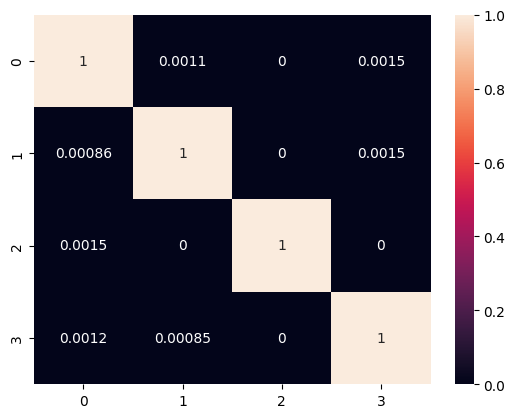

In [32]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
cm = confusion_matrix(y_test , pred , normalize='pred')
heatmap(cm , annot = True)

###  36% of data

In [5]:
model = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\new shape classifier\\shape_classifier_3_4_VS_cir_6_acc9982_36percent.h5')
model_1 = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\new shape classifier\\shape_classifier_circleVS6di_acc9995_36percent.h5')
model_2 = load_model('D:\\Project\\Traffic Sign Detection\\TrainedMOdel\\final\\new shape classifier\\shape_classifier_triangleVS4di_acc9967_36percent.h5')

In [7]:
pred = model.predict(x_test).argmax(axis = 1)
x_1 = x_test[pred == 0] # cir of 6
x_2 = x_test[pred == 1] # tri of 4

pred_1 = model_1.predict(x_1).argmax(axis = 1)
pred_2 = model_2.predict(x_2).argmax(axis = 1)
print(pred_2)

pred_1[pred_1 == 1] = 2 # 6

pred_2[pred_2 == 1] = 3 # 4
pred_2[pred_2 == 0] = 1 # tir


pred[pred == 0] = pred_1
pred[pred == 1] = pred_2

132/132 [==============================] - 0s 3ms/step
[0 0 1 ... 0 1 0]


In [10]:
cr = classification_report(y_test , pred )
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8160
           1       0.99      1.00      1.00      3510
           2       1.00      0.99      0.99       270
           3       1.00      0.98      0.99       690

    accuracy                           1.00     12630
   macro avg       1.00      0.99      0.99     12630
weighted avg       1.00      1.00      1.00     12630



In [11]:
cr = classification_report(y_test , pred , output_dict = True)
print(cr)

{'0': {'precision': 0.9982845239553976, 'recall': 0.998406862745098, 'f1-score': 0.9983456896023527, 'support': 8160}, '1': {'precision': 0.9943246311010215, 'recall': 0.9982905982905983, 'f1-score': 0.9963036678987774, 'support': 3510}, '2': {'precision': 1.0, 'recall': 0.9851851851851852, 'f1-score': 0.9925373134328358, 'support': 270}, '3': {'precision': 0.9955817378497791, 'recall': 0.9797101449275363, 'f1-score': 0.987582176771366, 'support': 690}, 'accuracy': 0.9970704671417261, 'macro avg': {'precision': 0.9970477232265496, 'recall': 0.9903981977871046, 'f1-score': 0.993692211926333, 'support': 12630}, 'weighted avg': {'precision': 0.9970730459031653, 'recall': 0.9970704671417261, 'f1-score': 0.9970659919302466, 'support': 12630}}


<AxesSubplot: >

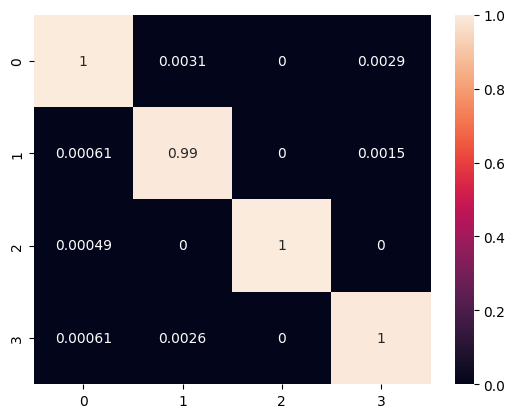

In [12]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap
cm = confusion_matrix(y_test , pred , normalize='pred')
heatmap(cm , annot = True)